In [1]:
import torch
import torchvision
import os
import numpy as np
import pandas as pd
from torchvision import transforms, datasets

from deepaugment.image_generator import deepaugment_image_generator
from deepaugment.image_generator import load_k_policies_from_csv


In [7]:

base_model = torch.load('./runs/04_05_2022/checkpoint/ckpt.pth', map_location=torch.device('cpu'))

In [14]:
base_model['acc']

95.24

In [15]:
randaug_model = torch.load('././runs/04_05_2022/checkpoint/randaugment_ckpt.pth', map_location=torch.device('cpu'))

In [16]:
randaug_model['acc']

94.99

In [4]:
from PIL import Image
# check if deepaugment argument is set.
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True)
numpy_X = trainset.data
numpy_y = np.asarray(trainset.targets)
policies_df = pd.read_csv('deepaug_policies.csv')
policies_list = load_k_policies_from_csv(policies_df, k=20)
image_gen = deepaugment_image_generator(numpy_X, numpy_y, policies_list, batch_size=1)
data_dir = './data/cifar-10-deepaugment'
if not os.path.isdir(data_dir):
        os.mkdir(data_dir)

counter = 0
for image, label in image_gen:
    #print('test')
    label = label[0]
    if not os.path.isdir(data_dir + '/' + str(label)):
        os.mkdir(data_dir + '/' + str(label))
    Image.fromarray(image[0]).save(data_dir + '/' + str(label) + '/' + str(label) + '_' + str(counter) + '.jpeg')
    counter += 1

print(counter)

#transform_train = transforms.Compose([
#    transforms.ToTensor(),
#    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
#])
#trainset = datasets.ImageFolder(
#    data_dir, transform_train
#)

Files already downloaded and verified
50000


In [62]:
len(numpy_X)

In [63]:
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE, shuffle=True)

In [64]:

X, y = next(iter(trainloader))
X.shape



torch.Size([64, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


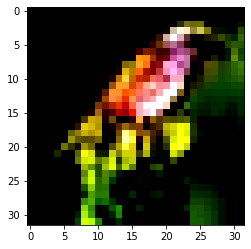

In [67]:
import matplotlib.pyplot as plt
plt.imshow(X[20].permute(1, 2, 0).numpy())

In [36]:
from PIL import Image
BATCH_SIZE=64
# check if deepaugment argument is set.
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True)
numpy_X = trainset.data
numpy_y = np.asarray(trainset.targets)
policies_df = pd.read_csv('deepaug_policies.csv')
policies_list = load_k_policies_from_csv(policies_df, k=20)
image_gen = deepaugment_image_generator(numpy_X, numpy_y, policies_list, batch_size=1)
data_dir = 'data/cifar-10-deepaugment'
counter = 0

Files already downloaded and verified
